In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# 忽略警告
warnings.filterwarnings('ignore')

# 加载所有必要数据集
orders = pd.read_csv('https://raw.githubusercontent.com/JamesLo94/schulich_data_science/main/Olist/olist_orders_dataset.csv')
customers = pd.read_csv('https://raw.githubusercontent.com/JamesLo94/schulich_data_science/main/Olist/olist_customers_dataset.csv')
reviews = pd.read_csv('https://raw.githubusercontent.com/JamesLo94/schulich_data_science/main/Olist/olist_order_reviews_dataset.csv')
items = pd.read_csv('https://raw.githubusercontent.com/JamesLo94/schulich_data_science/main/Olist/olist_order_items_dataset.csv')
sellers = pd.read_csv('https://raw.githubusercontent.com/JamesLo94/schulich_data_science/main/Olist/olist_sellers_dataset.csv')
products = pd.read_csv('https://raw.githubusercontent.com/JamesLo94/schulich_data_science/main/Olist/olist_products_dataset.csv')

In [2]:
# 2. DATA MERGING
# ==============
merged = (
    orders.merge(customers, on='customer_id')
    .merge(reviews, on='order_id')
    .merge(items, on='order_id')
    .merge(sellers, on='seller_id')
    .merge(products, on='product_id'))

In [3]:
# 3. DATA PREPARATION
# ===================
# Filter for furniture/home decor
print("\nFiltering furniture/decor products...")
furniture_categories = ['moveis_decoracao', 'moveis_sala', 'moveis_quarto']  # 使用原始葡萄牙语类别名
furniture_data = merged[merged['product_category_name'].isin(furniture_categories)]


Filtering furniture/decor products...


In [4]:
# Convert dates
date_cols = ['order_purchase_timestamp', 'order_delivered_customer_date']
for col in date_cols:
    furniture_data[col] = pd.to_datetime(furniture_data[col])

# Calculate delivery speed (in days)
furniture_data['delivery_speed'] = (
    furniture_data['order_delivered_customer_date'] - 
    furniture_data['order_purchase_timestamp']
).dt.days

# Remove outliers (deliveries <0 or >60 days)
furniture_data = furniture_data[
    (furniture_data['delivery_speed'] > 0) & 
    (furniture_data['delivery_speed'] < 60)
]

# Fill missing reviews with median
furniture_data['review_score'] = furniture_data['review_score'].fillna(
    furniture_data['review_score'].median())

In [8]:
# 4. EDA
# ==============
print("\nRunning exploratory analysis...")
plt.figure(figsize=(12,5))


Running exploratory analysis...


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Furniture Delivery Speed Distribution')

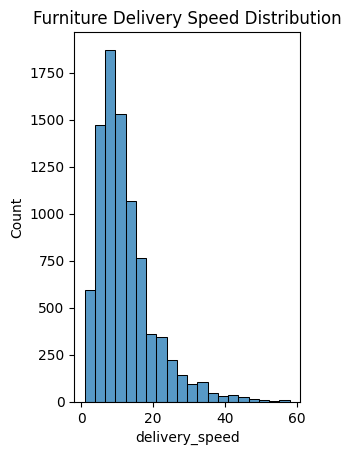

In [9]:
# Delivery speed distribution
plt.subplot(1,2,1)
sns.histplot(furniture_data['delivery_speed'], bins=20)
plt.title("Furniture Delivery Speed Distribution")

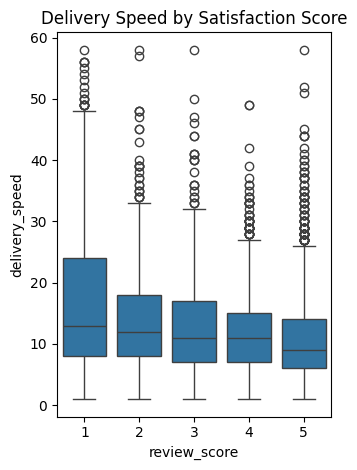

In [10]:
# Delivery speed vs Satisfaction
plt.subplot(1,2,2)
sns.boxplot(x='review_score', y='delivery_speed', data=furniture_data)
plt.title("Delivery Speed by Satisfaction Score")
plt.tight_layout()
plt.show()

In [11]:
# Calculate correlation
delivery_corr = furniture_data['delivery_speed'].corr(furniture_data['review_score'])
print(f"\nCorrelation between delivery speed and satisfaction: {delivery_corr:.3f}")


Correlation between delivery speed and satisfaction: -0.260
